# Insurance Industry in Africa Project

# - Problem Statement

The insurance industry in Africa faces various challenges, namely low market penetration, economic constraints, limited awareness and understanding of insurance products, and cultural attitudes towards risk. These challenges result in the insurance industry in Africa representing only about 1% of insured catastrophe losses worldwide. To address these issues, there is a need for innovative solutions that can effectively target and engage the African market, making insurance products accessible and appealing to a larger segment of the population. 

# - Goals

In [2]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import linear_kernel
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import pickle
import gc
import os

In [17]:
# Load the Excel file
file_path = 'insurance_claims_cleaned_data.xlsx'
data = pd.read_excel(file_path)

In [18]:
# Display the first few rows of the dataset
print(data.head())

   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         

In [7]:
# Path to excel file
filepath = "insurance_claims_cleaned_data.xlsx"

# Read the data using pandas
data = pd.read_excel(filepath)

# Print the first few rows of the data to get a glimpse
print(data.head())

   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         

# Exploratory Data Analysis (EDA)

In [19]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [20]:
# Display summary statistics of the dataset
print(data.describe())

       months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min

In [21]:
# Check for missing values
print(data.isnull().sum())

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                  0
bodily_injuries     

In [22]:
#Distribution of Numerical Features

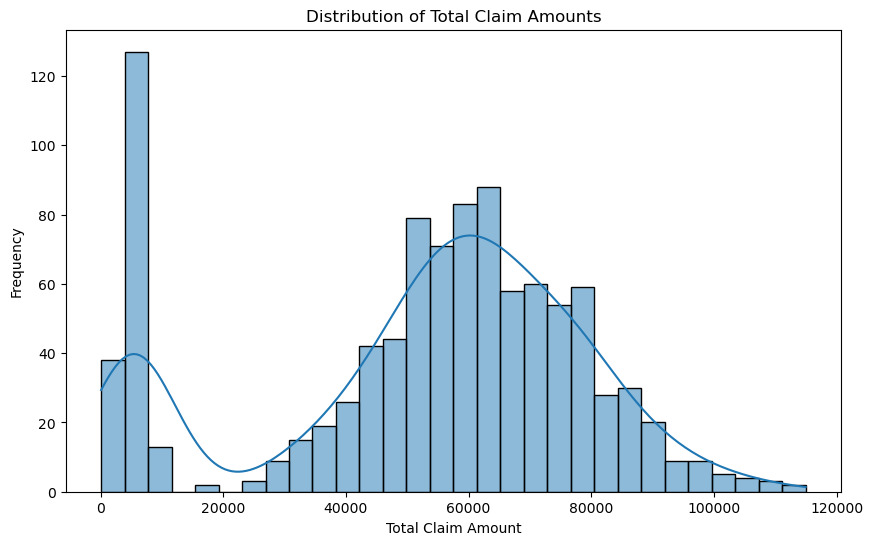

In [23]:
# Plot distribution of 'claim_amount'
plt.figure(figsize=(10, 6))
sns.histplot(data['total_claim_amount'], kde=True, bins=30)
plt.title('Distribution of Total Claim Amounts')
plt.xlabel('Total Claim Amount')
plt.ylabel('Frequency')
plt.show()

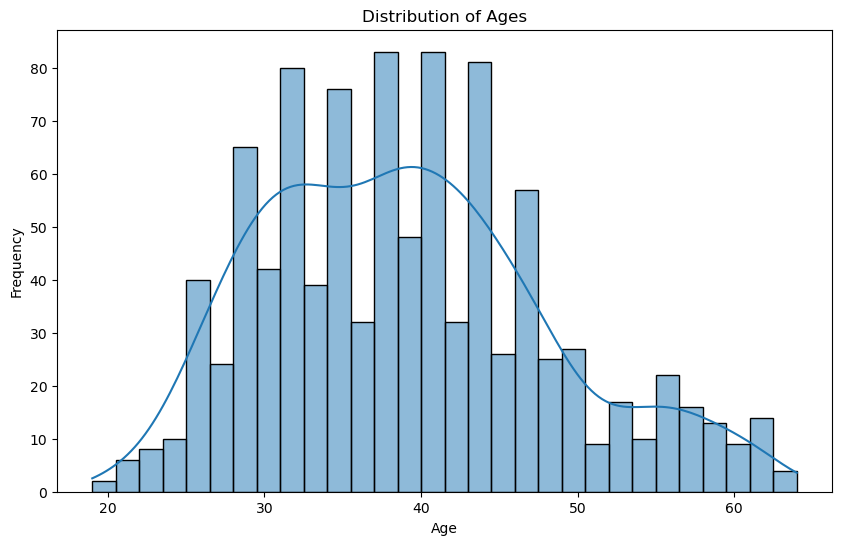

In [24]:
# Plot distribution of 'age'
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, bins=30)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [25]:
#Distribution of Categorical Features

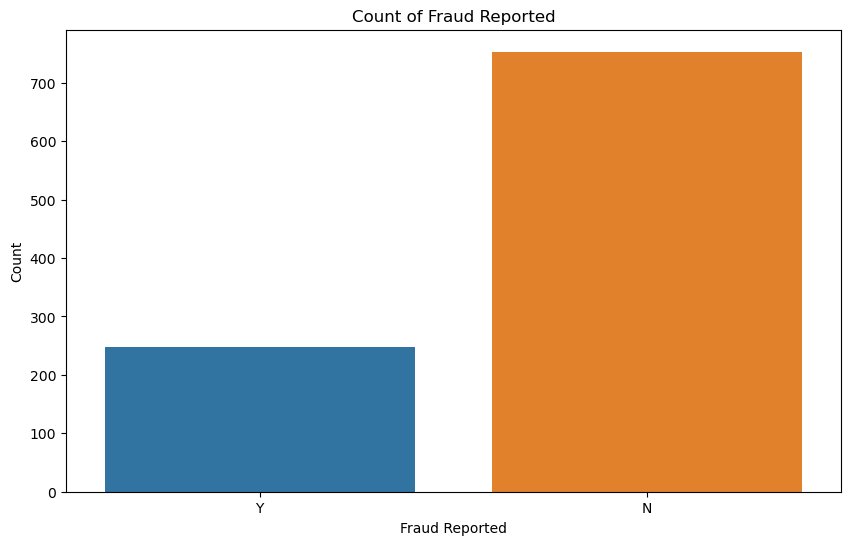

In [26]:
# Plot count of 'claim_type'
plt.figure(figsize=(10, 6))
sns.countplot(x='fraud_reported', data=data)
plt.title('Count of Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.show()

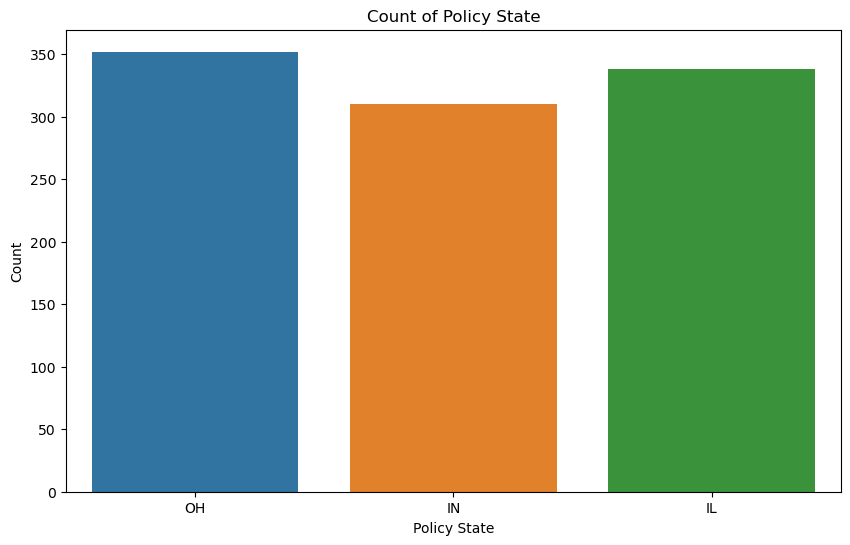

In [27]:
# Plot count of 'policy_state'
plt.figure(figsize=(10, 6))
sns.countplot(x='policy_state', data=data)
plt.title('Count of Policy State')
plt.xlabel('Policy State')
plt.ylabel('Count')
plt.show()

In [28]:
#Relationship between Numerical Features

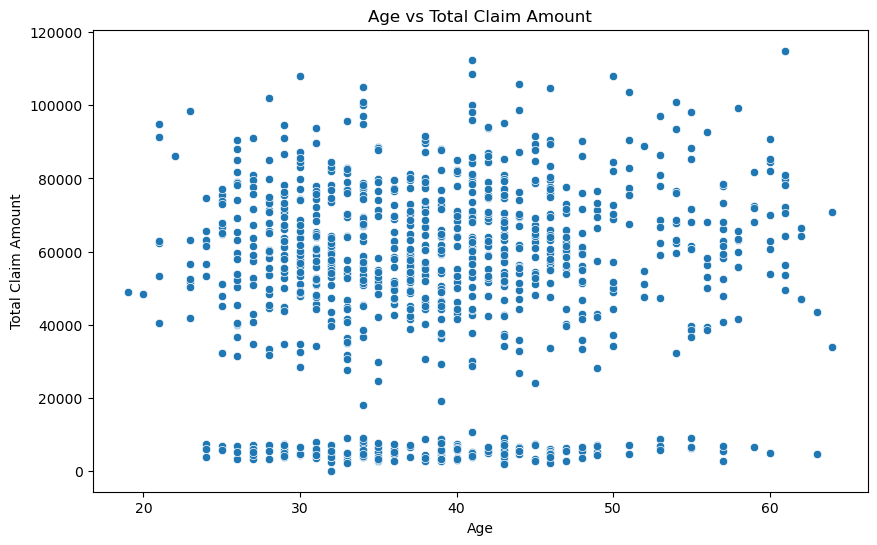

In [29]:
# Scatter plot of 'age' vs 'total_claim_amount'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='total_claim_amount', data=data)
plt.title('Age vs Total Claim Amount')
plt.xlabel('Age')
plt.ylabel('Total Claim Amount')
plt.show()

In [31]:
#Relationship between Categorical and Numerical Features

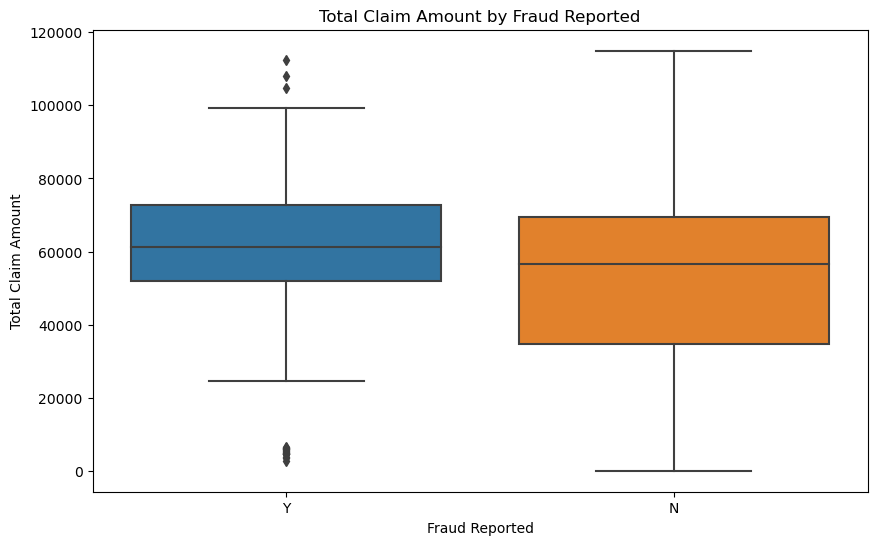

In [32]:
# Box plot of 'fraud_reported' vs 'total_claim_amount'
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_reported', y='total_claim_amount', data=data)
plt.title('Total Claim Amount by Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Total Claim Amount')
plt.show()

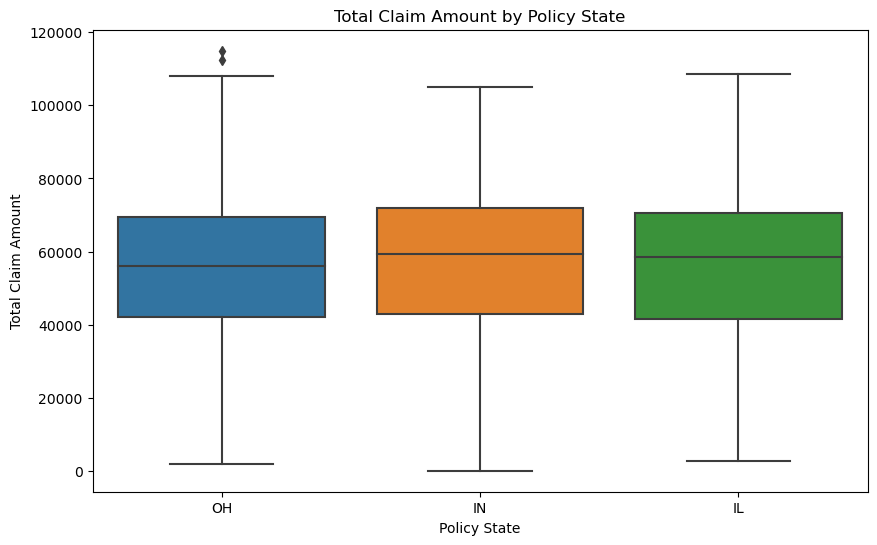

In [33]:
# Box plot of 'policy_state' vs 'total_claim_amount'
plt.figure(figsize=(10, 6))
sns.boxplot(x='policy_state', y='total_claim_amount', data=data)
plt.title('Total Claim Amount by Policy State')
plt.xlabel('Policy State')
plt.ylabel('Total Claim Amount')
plt.show()

In [36]:
#Pairplot

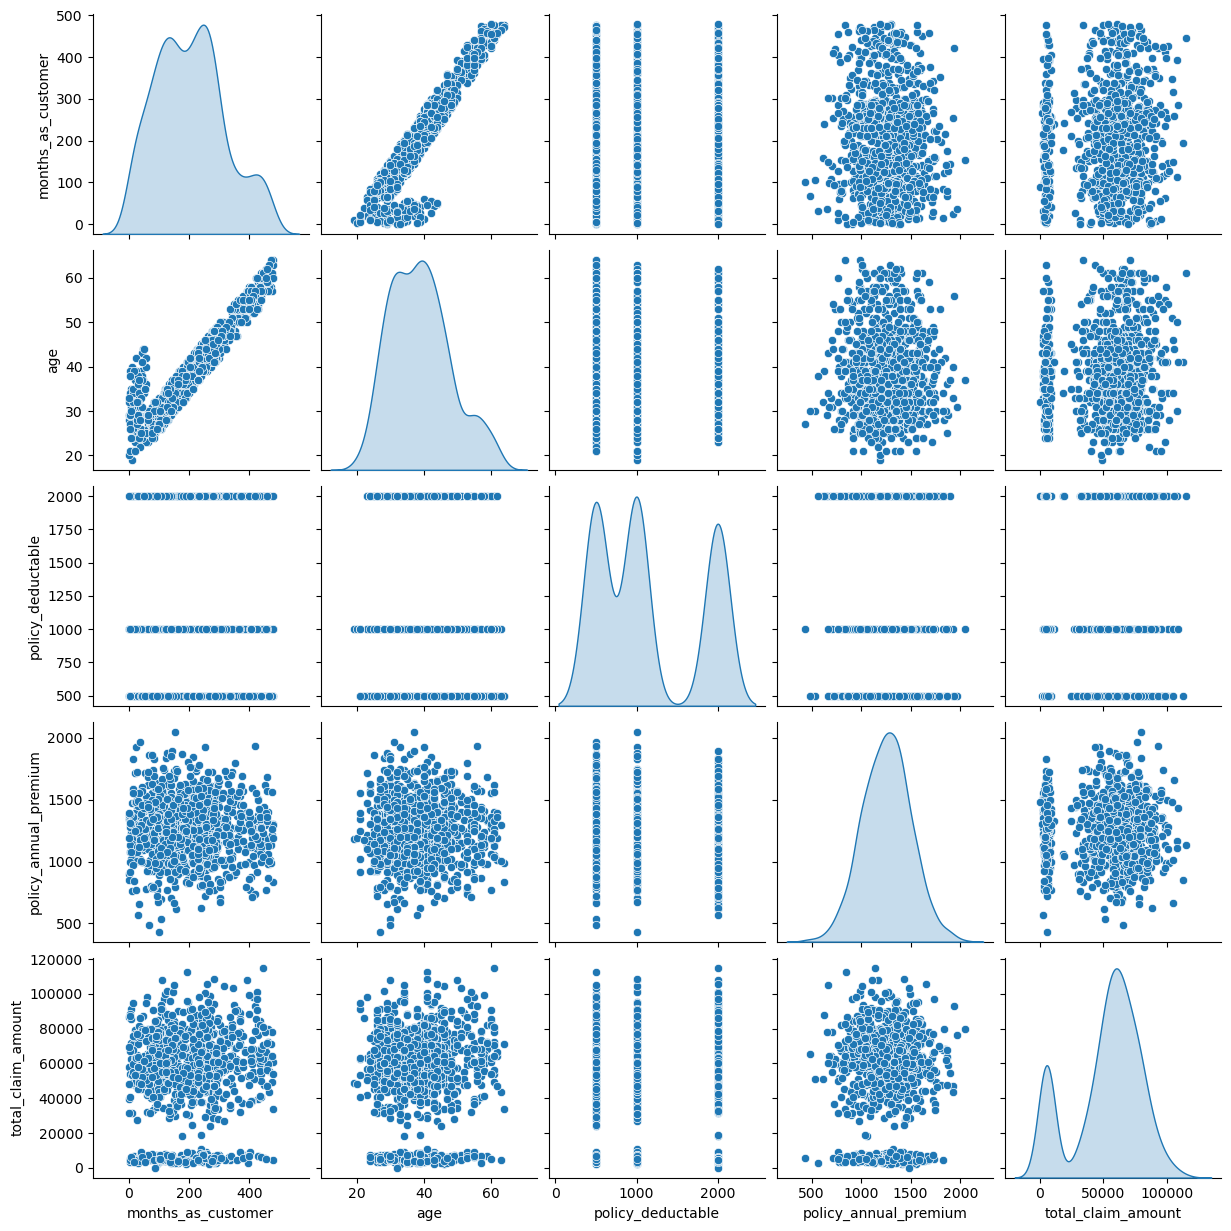

In [37]:
# Pairplot of selected numerical features
sns.pairplot(data[['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'total_claim_amount']], diag_kind='kde')
plt.show()

In [38]:
# Checking for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

collision_type             178
authorities_contacted       91
police_report_available    219
dtype: int64


In [39]:
# Handling missing values by filling with the median (for numerical columns)
data.fillna(data.median(), inplace=True)

C:\Users\W5666023\AppData\Local\Temp\ipykernel_6924\2996448923.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(data.median(), inplace=True)
C:\Users\W5666023\AppData\Local\Temp\ipykernel_6924\2996448923.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.median(), inplace=True)


In [40]:
# Handling missing values by filling with the mode (for categorical columns)
for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Analyze preferences by age group (e.g., average total claim amount by age group)

In [41]:
# Define age bins and labels
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '60+']

In [42]:
# Create a new column 'age_group'
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

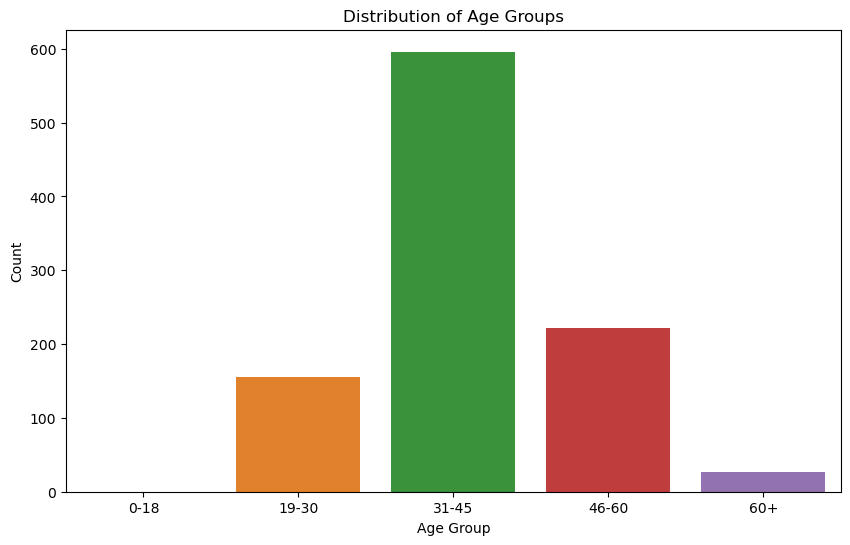

In [43]:
# Plot the count of each age group
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=data, order=labels)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [44]:
# Analyze preferences by age group (e.g., average total claim amount by age group)
age_group_claims = data.groupby('age_group')['total_claim_amount'].mean().reset_index()

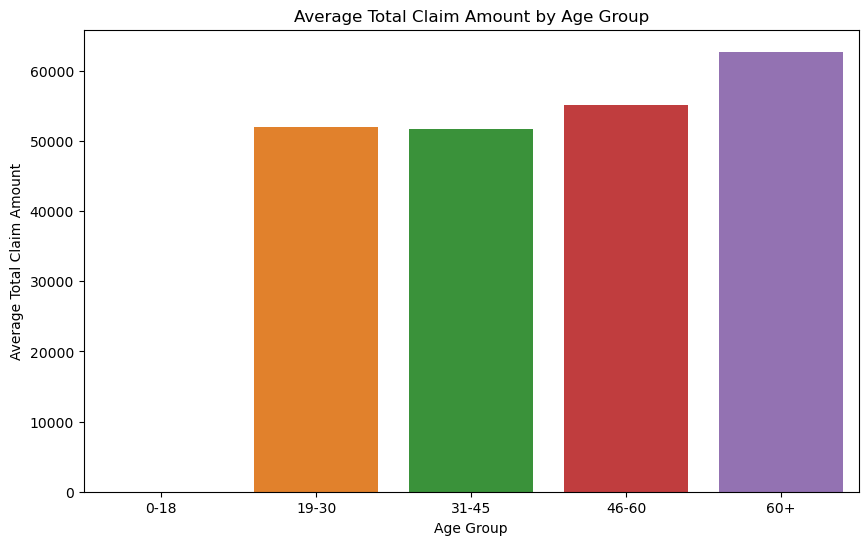

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='total_claim_amount', data=age_group_claims, order=labels)
plt.title('Average Total Claim Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Total Claim Amount')
plt.show()

In [46]:
#Policy State Segmentation

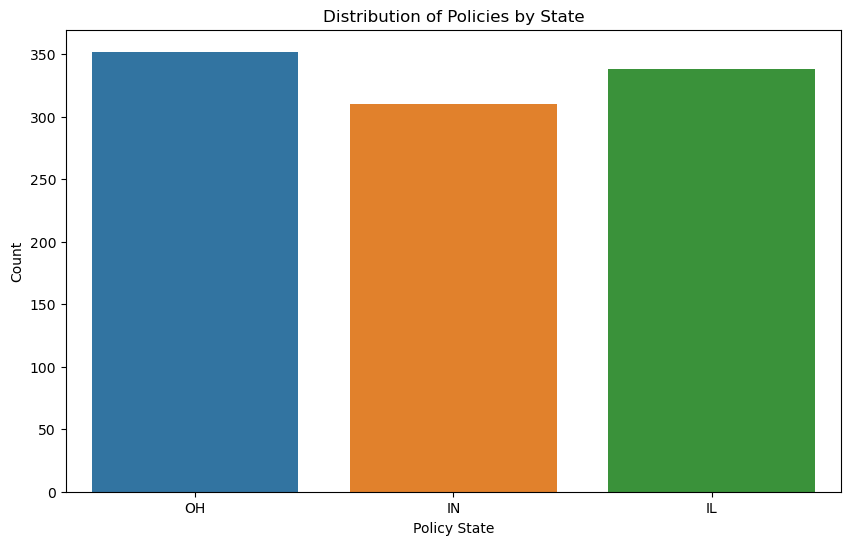

In [47]:
# Plot the count of policies by state
plt.figure(figsize=(10, 6))
sns.countplot(x='policy_state', data=data)
plt.title('Distribution of Policies by State')
plt.xlabel('Policy State')
plt.ylabel('Count')
plt.show()

In [48]:
# Analyze preferences by policy state (e.g., average total claim amount by state)
state_claims = data.groupby('policy_state')['total_claim_amount'].mean().reset_index()

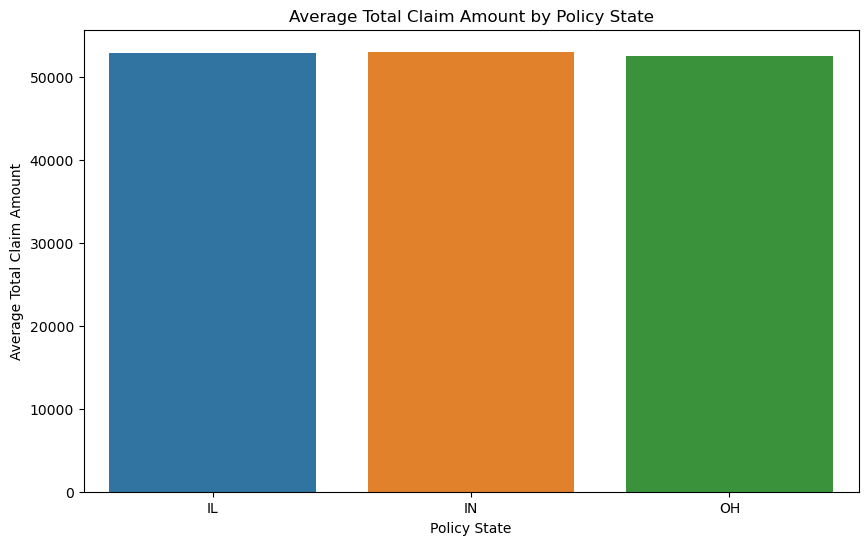

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='policy_state', y='total_claim_amount', data=state_claims)
plt.title('Average Total Claim Amount by Policy State')
plt.xlabel('Policy State')
plt.ylabel('Average Total Claim Amount')
plt.show()

# Analyze the Distribution of policy_state and policy_bind_date to Understand Market Penetration and Policy Trends

In [50]:
# Convert 'policy_bind_date' to datetime format
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'])

In [51]:
# Extract year and month from 'policy_bind_date'
data['policy_bind_year'] = data['policy_bind_date'].dt.year
data['policy_bind_month'] = data['policy_bind_date'].dt.to_period('M')

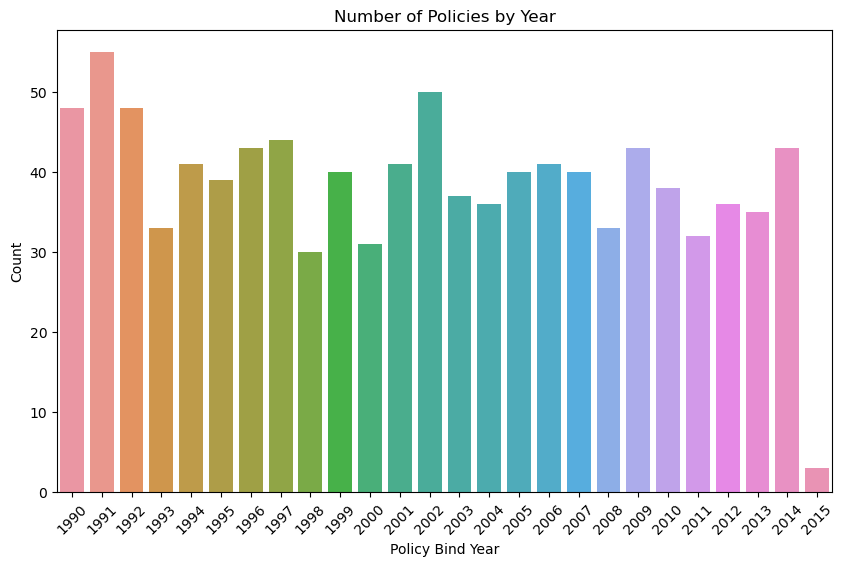

In [52]:
# Plot the number of policies by year
plt.figure(figsize=(10, 6))
sns.countplot(x='policy_bind_year', data=data)
plt.title('Number of Policies by Year')
plt.xlabel('Policy Bind Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

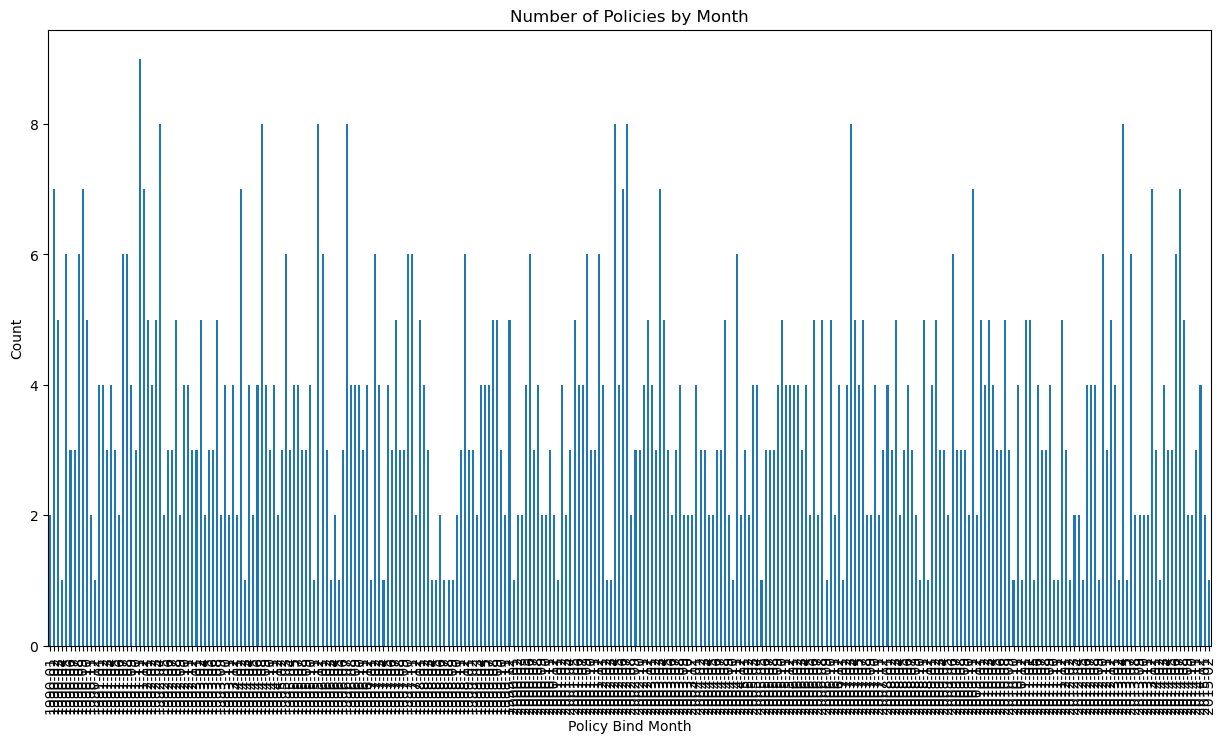

In [53]:
# Plot the number of policies by month
plt.figure(figsize=(15, 8))
data['policy_bind_month'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Policies by Month')
plt.xlabel('Policy Bind Month')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Identify High-Claim Regions and Demographics for Targeted Marketing

In [54]:
# Calculate total claim amount by state
state_total_claims = data.groupby('policy_state')['total_claim_amount'].sum().reset_index()

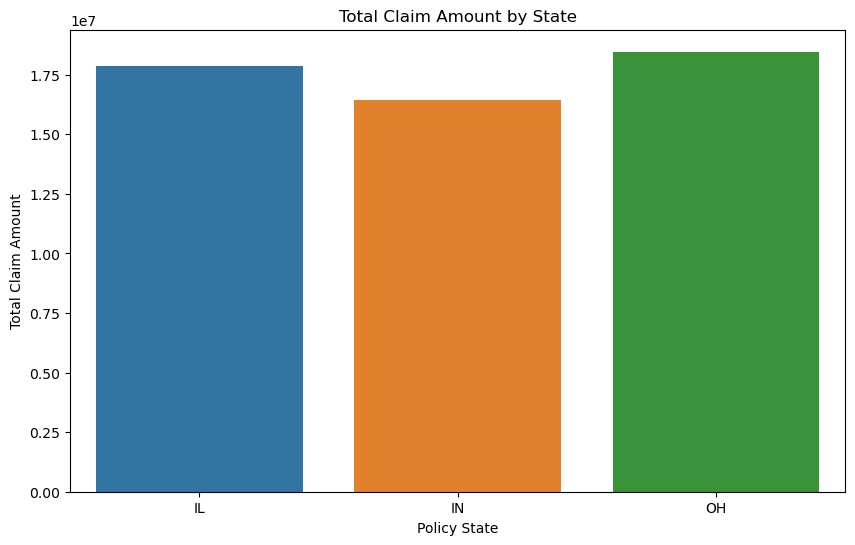

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x='policy_state', y='total_claim_amount', data=state_total_claims)
plt.title('Total Claim Amount by State')
plt.xlabel('Policy State')
plt.ylabel('Total Claim Amount')
plt.show()

In [56]:
#By Age Group

In [57]:
# Calculate total claim amount by age group
age_group_total_claims = data.groupby('age_group')['total_claim_amount'].sum().reset_index()

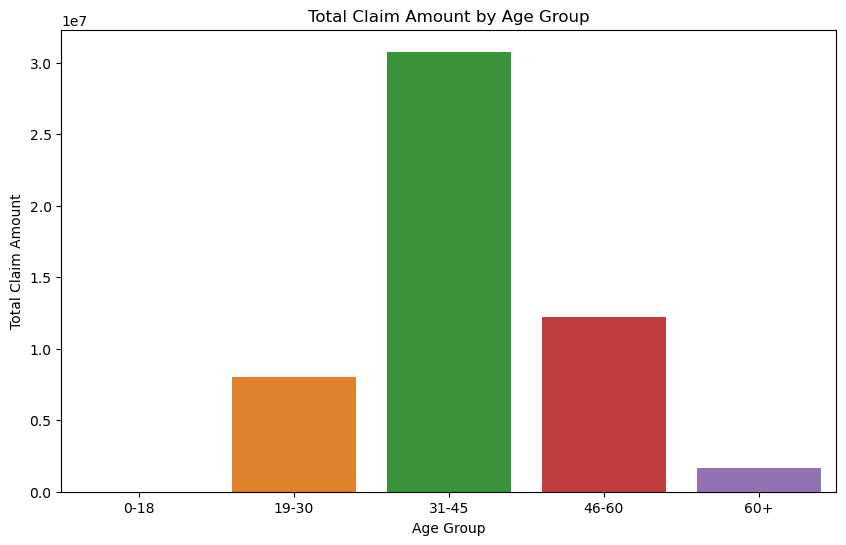

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='total_claim_amount', data=age_group_total_claims, order=labels)
plt.title('Total Claim Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Claim Amount')
plt.show()

In [59]:
#By Policy State

In [60]:
# Calculate total claim amount by policy state
state_total_claims = data.groupby('policy_state')['total_claim_amount'].sum().reset_index()

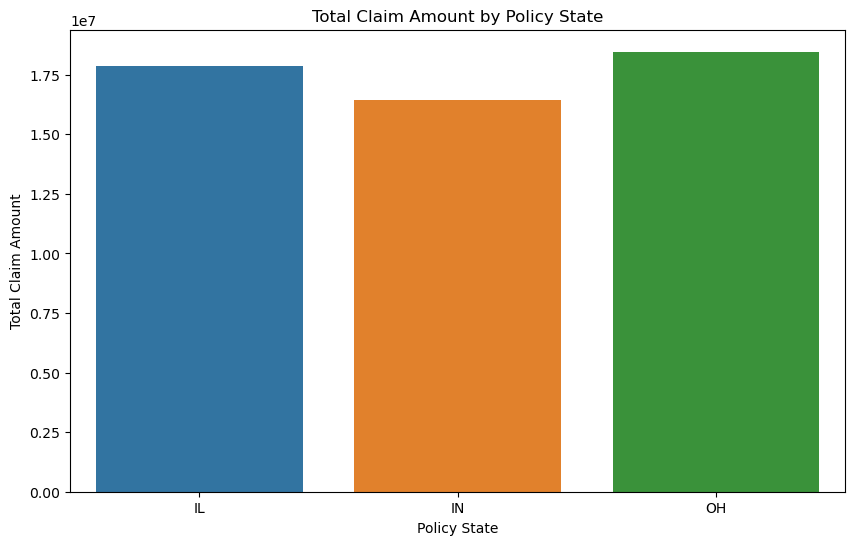

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x='policy_state', y='total_claim_amount', data=state_total_claims)
plt.title('Total Claim Amount by Policy State')
plt.xlabel('Policy State')
plt.ylabel('Total Claim Amount')
plt.show()

In [62]:
#By Age Group and Policy State

In [63]:
# Calculate total claim amount by age group and policy state
age_state_total_claims = data.groupby(['age_group', 'policy_state'])['total_claim_amount'].sum().unstack()

<Figure size 1500x1000 with 0 Axes>

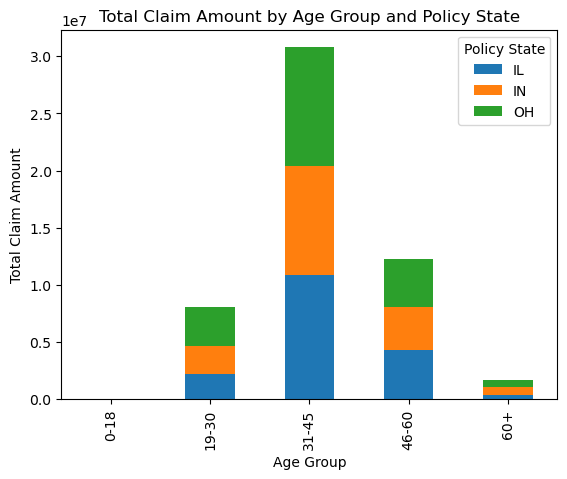

In [64]:
plt.figure(figsize=(15, 10))
age_state_total_claims.plot(kind='bar', stacked=True)
plt.title('Total Claim Amount by Age Group and Policy State')
plt.xlabel('Age Group')
plt.ylabel('Total Claim Amount')
plt.legend(title='Policy State')
plt.show()

# Feature Engineering

In [65]:
# Convert 'policy_bind_date' and 'incident_date' to datetime format
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'])
data['incident_date'] = pd.to_datetime(data['incident_date'])

In [66]:
# Calculate policy duration in days
data['policy_duration_days'] = (data['incident_date'] - data['policy_bind_date']).dt.days

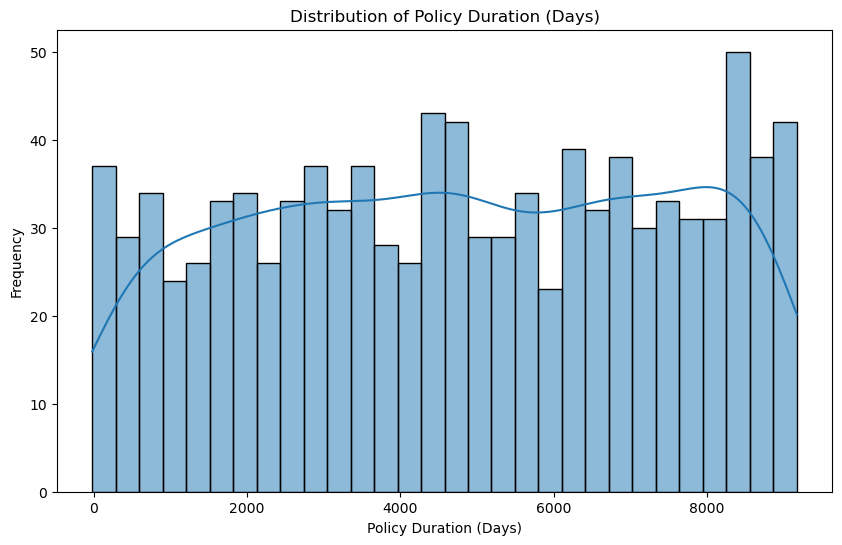

In [78]:
# Plot distribution of policy duration
plt.figure(figsize=(10, 6))
sns.histplot(data['policy_duration_days'], kde=True, bins=30)
plt.title('Distribution of Policy Duration (Days)')
plt.xlabel('Policy Duration (Days)')
plt.ylabel('Frequency')
plt.show()

In [67]:
# Calculate age at incident date
data['age_at_incident'] = data['incident_date'].dt.year - data['auto_year']

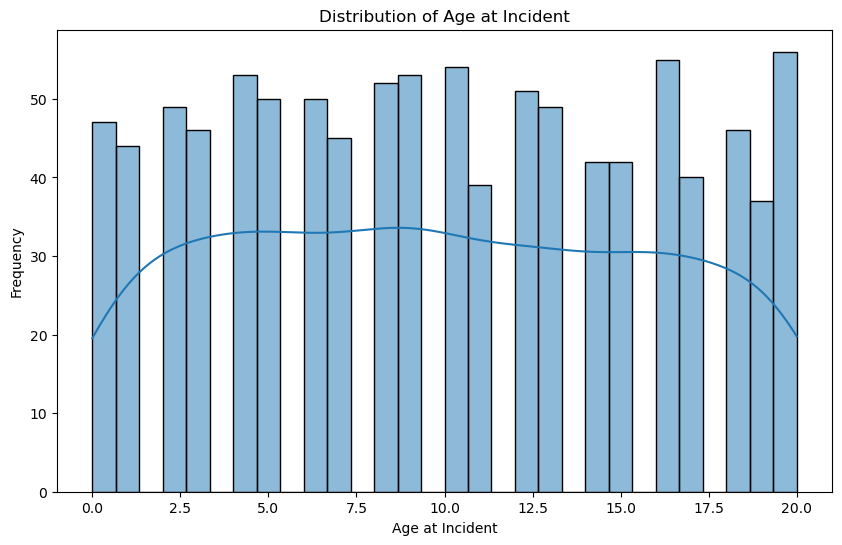

In [79]:
# Plot distribution of age at incident
plt.figure(figsize=(10, 6))
sns.histplot(data['age_at_incident'], kde=True, bins=30)
plt.title('Distribution of Age at Incident')
plt.xlabel('Age at Incident')
plt.ylabel('Frequency')
plt.show()

In [68]:
# Calculate vehicle age at incident date
data['vehicle_age'] = data['incident_date'].dt.year - data['auto_year']

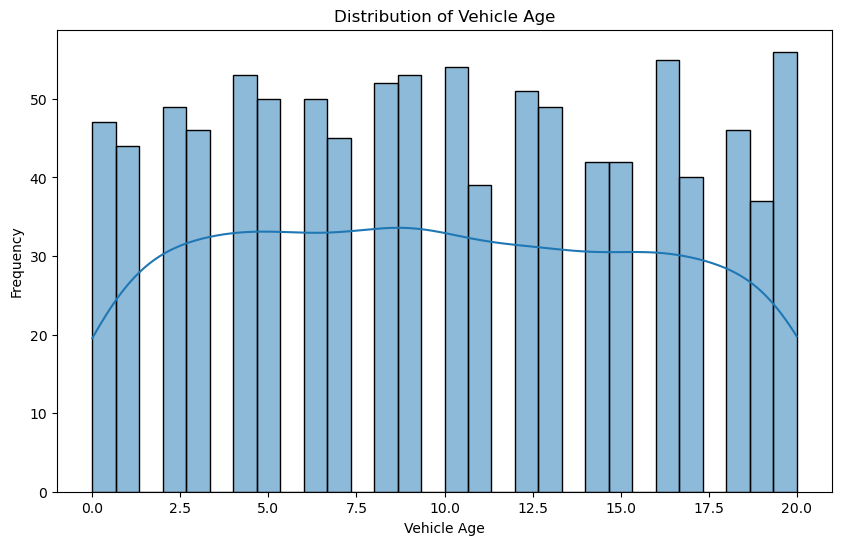

In [80]:
# Plot distribution of vehicle age
plt.figure(figsize=(10, 6))
sns.histplot(data['vehicle_age'], kde=True, bins=30)
plt.title('Distribution of Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Frequency')
plt.show()

In [70]:
# Extract month and quarter from incident_date
data['incident_month'] = data['incident_date'].dt.month
data['incident_quarter'] = data['incident_date'].dt.quarter

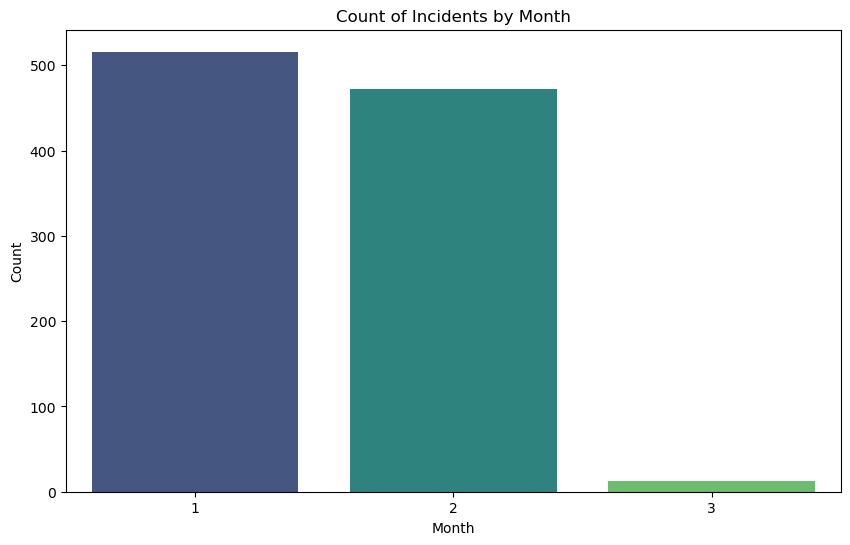

In [81]:
# Plot count of incidents by month
plt.figure(figsize=(10, 6))
sns.countplot(x='incident_month', data=data, palette='viridis')
plt.title('Count of Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [71]:
# Example: Convert 'fraud_reported' to binary (1 for 'Y', 0 for 'N')
data['fraud_reported_binary'] = data['fraud_reported'].apply(lambda x: 1 if x == 'Y' else 0)

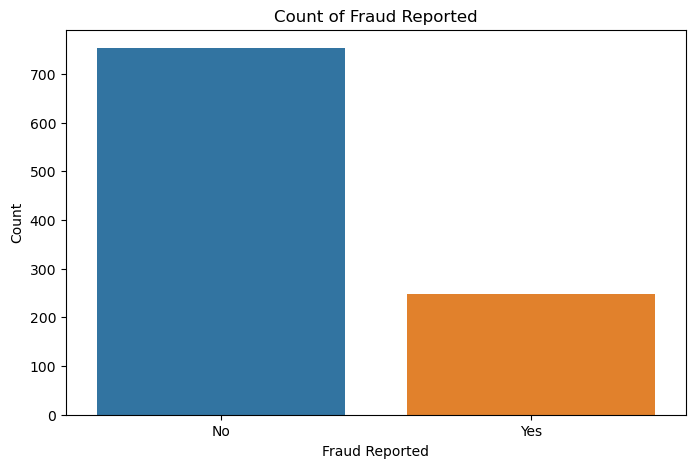

In [82]:
# Plot count of fraud reported
plt.figure(figsize=(8, 5))
sns.countplot(x='fraud_reported_binary', data=data)
plt.title('Count of Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [72]:
# Example: Categorize total_claim_amount into risk classes
data['risk_class'] = pd.cut(data['total_claim_amount'], bins=[0, 10000, 50000, 100000, float('inf')],
                            labels=['Low', 'Medium', 'High', 'Very High'])

In [73]:
# Example: Interaction between age and total_claim_amount
data['age_claim_interaction'] = data['age'] * data['total_claim_amount']

In [74]:
from sklearn.preprocessing import StandardScaler

# Example: Normalize 'policy_annual_premium'
scaler = StandardScaler()
data['policy_annual_premium_normalized'] = scaler.fit_transform(data[['policy_annual_premium']])

In [75]:
# Example: Extract city or region from 'incident_location'
data['incident_location_city'] = data['incident_location'].apply(lambda x: x.split(',')[0])

In [76]:
# Example: Frequency encoding for 'auto_make'
auto_make_frequency = data['auto_make'].value_counts(normalize=True)
data['auto_make_frequency'] = data['auto_make'].map(auto_make_frequency)

In [77]:
# After applying feature engineering, you may want to check the updated dataset
print(data.head())

   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... age_at_incident vehicle_age incident_month  \
0       466132  ...              11   